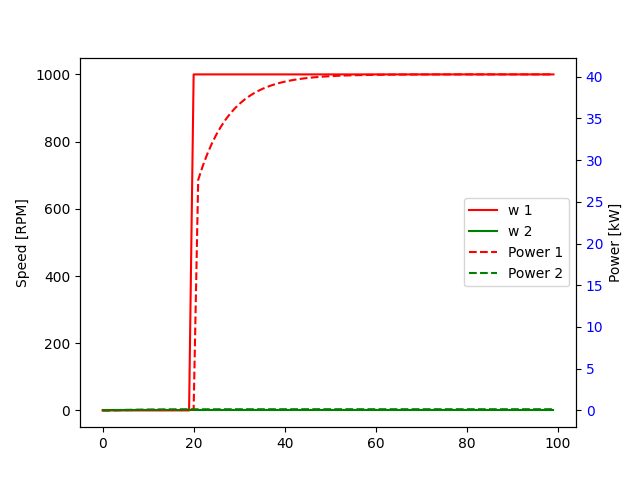

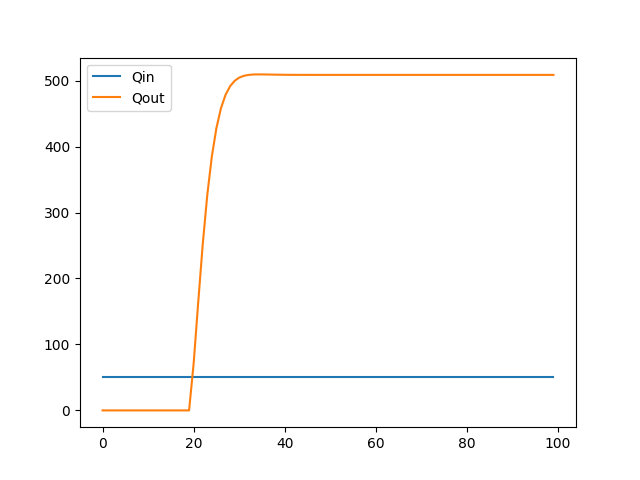

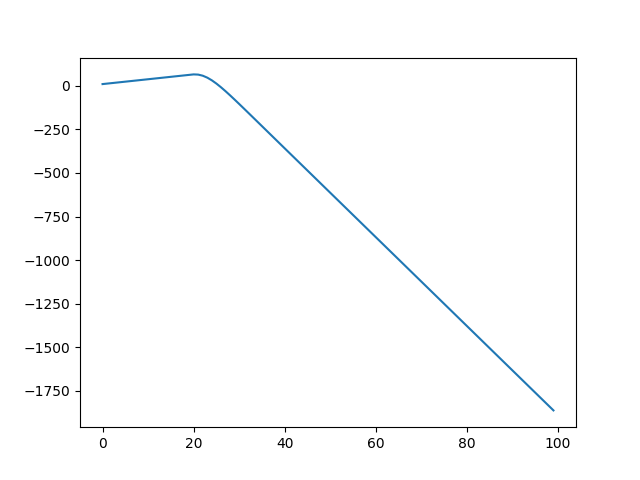

In [1]:
%matplotlib widget
import casadi as ca
import matplotlib.pyplot as plt
import numpy as np


# Create an Opti instance
opti = ca.Opti()

#=========== Parameters of the ARX model
#A (ny x (na1+na2)) na1,2: lags on y1,2
A_power = np.array([[8.6870E-01,0],[0,8.7838E-01]])
# A_outflow = np.array([[1.2995], \
#                       [-4.3918E-01], \
#                       [4.5231E-02], \
#                       [0], \
#                       [1.0387E-02]])

# B (ny x (nb1+nb2)) nb1,2: lags on u1,2
B_power = np.array([[2.7560E-02,0,-2.2282E-02,0],[0,3.5775E-02,0,-3.0685E-02]])
# B_outflow = np.array([[[7.1049E-02], [4.1327E-02], [6.4801E-02], [0], [-6.6199E-02]]]).T

C_power = np.array([1.0790E-02,1.7240E-02])
# C_outflow = np.array([-7.3292E+01])


#=========== Define the Horizon
N = 100  

#=========== Declare Symbolic Variables (SISO but can be extended to MIMO or MISO)
Qout = np.zeros(N)
P = np.zeros((2,N))
h = np.zeros(N)
# P = opti.variable(2,N)
w = np.zeros((2,N))
Qin = np.ones(N)*50

Ts = 1 # ?
A = 18


w[0,20:] = 1000
# w[1,3:] = 1500

# ARX model constraints
for t in range(2, N):
    Qout[t] = 1.2995 * Qout[t-1] -4.3918E-01 * Qout[t-2] + 7.1049E-02 * w[0,t] + 0
    P_t = A_power @ ca.vcat(P[:,t-1]) +B_power @ ca.vcat([w[:,t-1],w[:,t-2]]) + ca.vcat(C_power)
    P[:,t] = np.reshape(P_t,(2,))

h[0] = 10
for t in range(1, N):    
    h[t] = h[t-1] + Ts/A*(Qin[t-1]-Qout[t-1])




plt.clf()    
ax1 = plt.subplot(1,1,1)
plt.plot(w[0,:],"r",label='w 1')
plt.plot(w[1,:],"g",label='w 2')
plt.ylabel('Speed [RPM]')
ax12 = ax1.twinx()
ax12.plot(P[0,:],"r--",label='Power 1')
ax12.plot(P[1,:],"g--",label='Power 2')
ax12.set_ylabel('Power [kW]')
ax12.tick_params(axis ='y', labelcolor = 'blue')
h1, l1 = ax1.get_legend_handles_labels()
h12, l12 = ax12.get_legend_handles_labels()
ax1.legend(h1+h12, l1+l12, loc=5) 
plt.show()

plt.figure()
plt.plot(h,label='h')
plt.figure()
plt.plot(Qin,label='Qin')
plt.plot(Qout,label='Qout')
plt.legend()
plt.show()


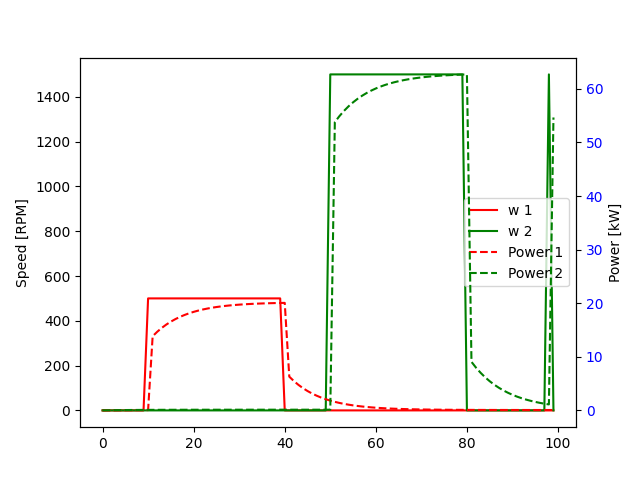

In [2]:
from src.opti_ARX_model import ARXModel

P = np.zeros((2,N))
w = np.zeros((2,N))
w[0,10:40] = 500
w[1,50:80] = 1500
w[1,-2:-1] = 1500

ARX_power = ARXModel(A_power,B_power,C_power,np.zeros(2),np.zeros(4))
# ARX_power.update_state([0, 1, 0, 1])

for t in range(0, N):
    P_t = ARX_power.update_state(w[:,t])
    P[:,t] = np.reshape(P_t,(2,))

plt.figure()    
ax1 = plt.subplot(1,1,1)
plt.plot(w[0,:],"r",label='w 1')
plt.plot(w[1,:],"g",label='w 2')
plt.ylabel('Speed [RPM]')
ax12 = ax1.twinx()
ax12.plot(P[0,:],"r--",label='Power 1')
ax12.plot(P[1,:],"g--",label='Power 2')
ax12.set_ylabel('Power [kW]')
ax12.tick_params(axis ='y', labelcolor = 'blue')
h1, l1 = ax1.get_legend_handles_labels()
h12, l12 = ax12.get_legend_handles_labels()
ax1.legend(h1+h12, l1+l12, loc=5) 
plt.show() 

